In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
dataset,dataset_info = tfds.load(
                                  'malaria',
                                  with_info=True,
                                  as_supervised=True,
                                  shuffle_files = True,
                                  split=['train']
                                )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteOCBF8P/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [20]:
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0 , label
dataset[0] = dataset[0].map(resize_rescale)
dataset[0] = dataset[0].batch(32)

In [13]:
def dataset_split(dataset,Train_Ratio,Val_Ratio,Test_Ratio):
  Dataset_Size = len(dataset)
  train_dataset = dataset.take(int(Dataset_Size*Train_Ratio))
  val_dataset = dataset.skip(int(Dataset_Size*Train_Ratio)).take(int(Dataset_Size*Val_Ratio))
  test_dataset = dataset.skip(int(Dataset_Size*Train_Ratio)).skip(int(Dataset_Size*Val_Ratio)).take(int(Dataset_Size*Test_Ratio))

  return train_dataset,val_dataset,test_dataset


In [14]:
train_dataset,val_dataset,test_dataset = dataset_split(dataset[0],0.8,0.1,0.1)

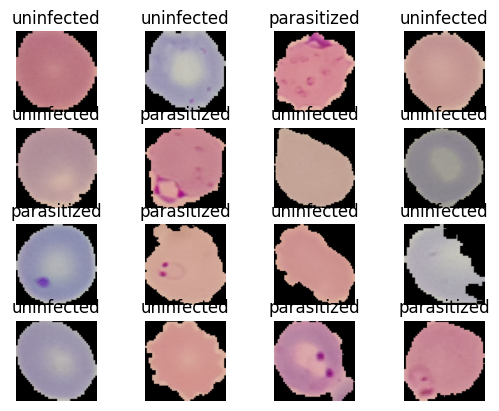

In [10]:
for i,(image,label) in enumerate(train_dataset.take(16)):
  plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [15]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [16]:
val_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [17]:
test_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [33]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6,kernel_size=3,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16,kernel_size=3,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    Dense(100,activation="relu"),
    BatchNormalization(),

    Dense(10,activation="relu"),
    BatchNormalization(),

    Dense(1,activation="sigmoid")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_2 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_3 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                      

In [36]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics="accuracy"
              )

In [37]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=20,verbose=1)

Epoch 1/20
689/689 [==============================] - 59s 80ms/step - loss: 0.2251 - accuracy: 0.9234 - val_loss: 1.2080 - val_accuracy: 0.7689
Epoch 2/20
689/689 [==============================] - 75s 108ms/step - loss: 0.1985 - accuracy: 0.9323 - val_loss: 70.1188 - val_accuracy: 0.5040
Epoch 3/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1651 - accuracy: 0.9459 - val_loss: 1.7070 - val_accuracy: 0.4088
Epoch 4/20
689/689 [==============================] - 73s 105ms/step - loss: 0.1571 - accuracy: 0.9494 - val_loss: 0.9956 - val_accuracy: 0.8165
Epoch 5/20
689/689 [==============================] - 57s 82ms/step - loss: 0.1527 - accuracy: 0.9482 - val_loss: 150.3557 - val_accuracy: 0.5055
Epoch 6/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1428 - accuracy: 0.9527 - val_loss: 1.1198 - val_accuracy: 0.4949
Epoch 7/20
689/689 [==============================] - 72s 104ms/step - loss: 0.1323 - accuracy: 0.9557 - val_loss: 15.7055 - val_ac

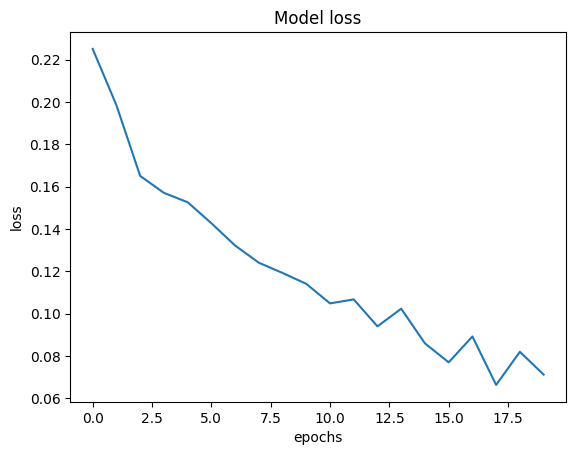

In [41]:
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

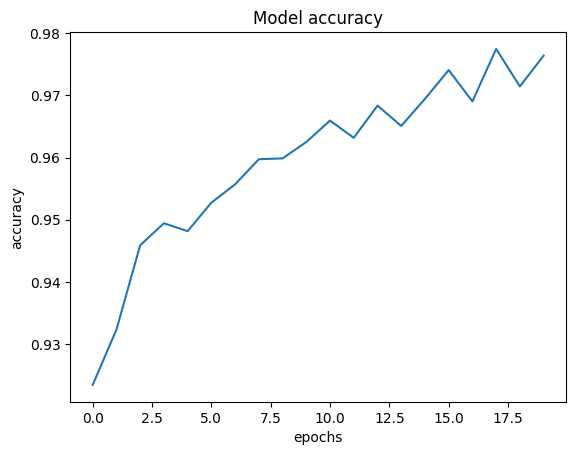

In [42]:
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()